Dataset shape: (368065, 24)
Columns:
 ['Timestamp', 'Incident_Severity', 'Incident_Type', 'Region_Type', 'Traffic_Congestion', 'Weather_Condition', 'Drone_Availability', 'Ambulance_Availability', 'Battery_Life', 'Air_Traffic', 'Response_Time', 'Hospital_Capacity', 'Distance_to_Incident', 'Number_of_Injuries', 'Specialist_Availability', 'Road_Type', 'Emergency_Level', 'Drone_Speed', 'Ambulance_Speed', 'Payload_Weight', 'Fuel_Level', 'Weather_Impact', 'Dispatch_Coordinator', 'Label']


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4839 - loss: 0.9606 - val_accuracy: 0.4990 - val_loss: 0.9440
Epoch 2/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4985 - loss: 0.9463 - val_accuracy: 0.4990 - val_loss: 0.9432
Epoch 3/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5003 - loss: 0.9441 - val_accuracy: 0.4990 - val_loss: 0.9426
Epoch 4/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4987 - loss: 0.9452 - val_accuracy: 0.4990 - val_loss: 0.9425
Epoch 5/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5000 - loss: 0.9430 - val_accuracy: 0.4990 - val_loss: 0.9426
Epoch 6/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5003 - loss: 0.9435 - val_accuracy: 0.4990 - val_loss: 0.9422
Epoch 7/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5002 - loss: 0.9432 - val_accuracy: 0.4990 - val_loss: 0.9423
Epoch 8/20
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4974 - loss: 0.9445 - 

Model saved to C:\Users\sagni\Downloads\CrowdAssist\emergency_classifier_model.h5


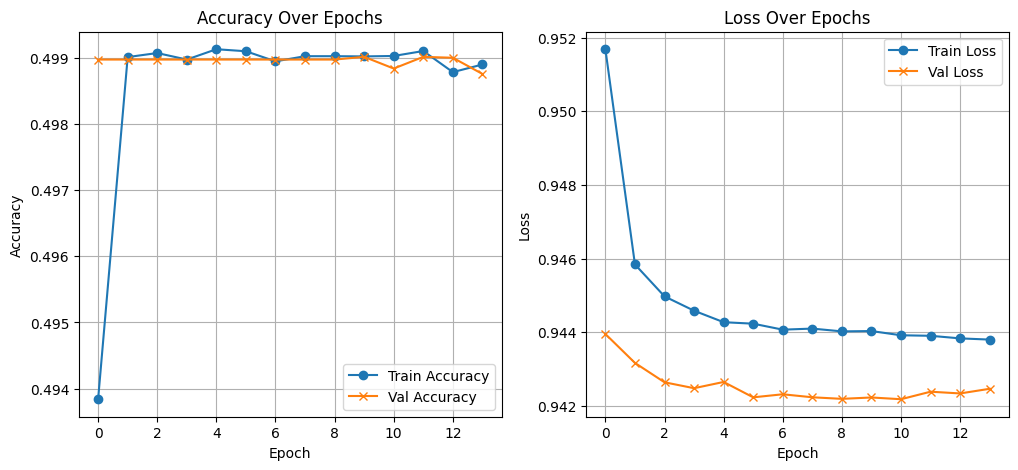

Accuracy/Loss graph saved to C:\Users\sagni\Downloads\CrowdAssist\training_accuracy_loss.png
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step


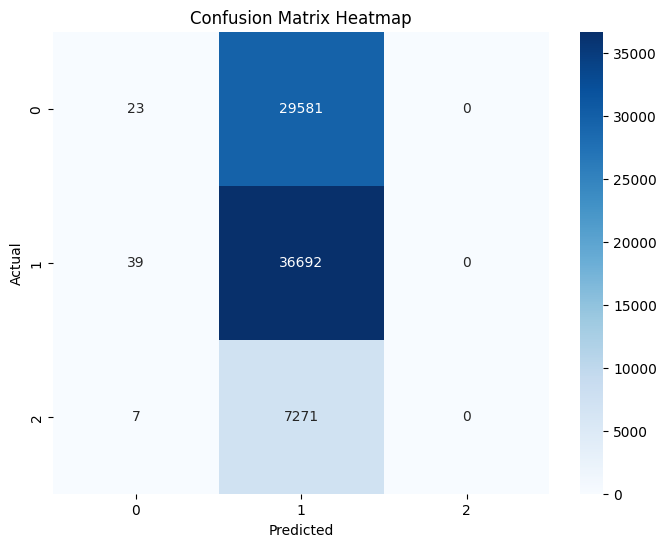

Confusion matrix heatmap saved to C:\Users\sagni\Downloads\CrowdAssist\confusion_matrix_heatmap.png
Classification report saved to: C:\Users\sagni\Downloads\CrowdAssist\keras_model_report.txt


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [1]:
# 📌 Cell 1: Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# 📌 Cell 2: Paths
data_path = r"C:\Users\sagni\Downloads\CrowdAssist\emergency_service_routing_with_timestamps.csv"
output_dir = r"C:\Users\sagni\Downloads\CrowdAssist"
os.makedirs(output_dir, exist_ok=True)

# 📌 Cell 3: Load data
df = pd.read_csv(data_path)
print("Dataset shape:", df.shape)
print("Columns:\n", df.columns.tolist())
df.head()

# 📌 Cell 4: Preprocess
# Drop nulls
df.dropna(subset=['Timestamp', 'Incident_Severity', 'Incident_Type', 'Label'], inplace=True)

# Encode categorical columns
categorical_cols = [
    'Incident_Severity', 'Incident_Type', 'Region_Type', 'Traffic_Congestion',
    'Weather_Condition', 'Drone_Availability', 'Ambulance_Availability',
    'Air_Traffic', 'Specialist_Availability', 'Road_Type',
    'Emergency_Level', 'Weather_Impact', 'Dispatch_Coordinator', 'Label'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Drop timestamp
df.drop(columns=['Timestamp'], inplace=True)

# Save cleaned data
cleaned_path = os.path.join(output_dir, 'cleaned_data.csv')
df.to_csv(cleaned_path, index=False)

# 📌 Cell 5: Split & scale
X = df.drop(columns=['Label'])
y = df['Label']
num_classes = len(np.unique(y))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# 📌 Cell 6: Build Keras model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# 📌 Cell 7: Train
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# 📌 Cell 8: Save model as H5
h5_path = os.path.join(output_dir, 'emergency_classifier_model.h5')
model.save(h5_path)
print(f"Model saved to {h5_path}")

# 📌 Cell 9: Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

graph_path = os.path.join(output_dir, 'training_accuracy_loss.png')
plt.savefig(graph_path)
plt.show()
print(f"Accuracy/Loss graph saved to {graph_path}")

# 📌 Cell 10: Confusion Matrix Heatmap
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
heatmap_path = os.path.join(output_dir, 'confusion_matrix_heatmap.png')
plt.savefig(heatmap_path)
plt.show()
print(f"Confusion matrix heatmap saved to {heatmap_path}")

# 📌 Cell 11: Classification Report
report = classification_report(y_test, y_pred_classes)
report_path = os.path.join(output_dir, 'keras_model_report.txt')
with open(report_path, 'w') as f:
    f.write(report)
print("Classification report saved to:", report_path)
